In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import random
import warnings; warnings.simplefilter('ignore')

In [2]:
def EqCons(eps,b):
    c = [{'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[8]+p[9]+p[10]+p[11]+p[12]+p[13]+p[14]+p[15]-math.exp(eps[0]/b)/(math.exp(eps[0]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[16]+p[17]+p[18]+p[19]+p[20]+p[21]+p[22]+p[23]-math.exp(eps[1]/b)/(math.exp(eps[1]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[8]+p[9]+p[10]+p[11]+p[16]+p[17]+p[18]+p[19]+p[24]+p[25]+p[26]+p[27]-math.exp(eps[2]/b)/(math.exp(eps[2]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[4]+p[5]+p[8]+p[9]+p[12]+p[13]+p[16]+p[17]+p[20]+p[21]+p[24]+p[25]+p[28]+p[29]-math.exp(eps[3]/b)/(math.exp(eps[3]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[2]+p[4]+p[6]+p[8]+p[10]+p[12]+p[14]+p[16]+p[18]+p[20]+p[22]+p[24]+p[26]+p[28]+p[30]-math.exp(eps[4]/b)/(math.exp(eps[4]/b)+1)}]    
    return c

def InEqCons(eps,b):
    c = [{'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[0]-math.exp(eps[4]/b)*p[1]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[0]-math.exp(eps[3]/b)*p[2]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[0]-math.exp(eps[2]/b)*p[4]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[0]-math.exp(eps[1]/b)*p[8]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[0]-math.exp(eps[0]/b)*p[16]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[1]-math.exp(eps[3]/b)*p[3]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[1]-math.exp(eps[2]/b)*p[5]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[1]-math.exp(eps[1]/b)*p[9]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[1]-math.exp(eps[0]/b)*p[17]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[2]-math.exp(eps[4]/b)*p[3]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[2]-math.exp(eps[2]/b)*p[6]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[2]-math.exp(eps[1]/b)*p[10]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[2]-math.exp(eps[0]/b)*p[18]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[3]-math.exp(eps[2]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[3]-math.exp(eps[1]/b)*p[11]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[3]-math.exp(eps[0]/b)*p[19]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[4]-math.exp(eps[4]/b)*p[5]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[4]-math.exp(eps[3]/b)*p[6]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[4]-math.exp(eps[1]/b)*p[12]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[4]-math.exp(eps[0]/b)*p[20]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[5]-math.exp(eps[3]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[5]-math.exp(eps[1]/b)*p[13]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[5]-math.exp(eps[0]/b)*p[21]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[6]-math.exp(eps[4]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[6]-math.exp(eps[1]/b)*p[14]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[6]-math.exp(eps[0]/b)*p[22]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[7]-math.exp(eps[1]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[7]-math.exp(eps[0]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[8]-math.exp(eps[4]/b)*p[9]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[8]-math.exp(eps[3]/b)*p[10]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[8]-math.exp(eps[2]/b)*p[12]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[8]-math.exp(eps[0]/b)*p[24]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[9]-math.exp(eps[3]/b)*p[11]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[9]-math.exp(eps[2]/b)*p[13]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[9]-math.exp(eps[0]/b)*p[25]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[10]-math.exp(eps[4]/b)*p[11]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[10]-math.exp(eps[2]/b)*p[14]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[10]-math.exp(eps[0]/b)*p[26]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[11]-math.exp(eps[2]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[11]-math.exp(eps[0]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[12]-math.exp(eps[4]/b)*p[13]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[12]-math.exp(eps[3]/b)*p[14]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[12]-math.exp(eps[0]/b)*p[28]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[13]-math.exp(eps[3]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[13]-math.exp(eps[0]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[14]-math.exp(eps[4]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[14]-math.exp(eps[0]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[15]-math.exp(eps[0]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[16]-math.exp(eps[4]/b)*p[17]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[16]-math.exp(eps[3]/b)*p[18]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[16]-math.exp(eps[2]/b)*p[20]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[16]-math.exp(eps[1]/b)*p[24]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[17]-math.exp(eps[3]/b)*p[19]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[17]-math.exp(eps[2]/b)*p[21]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[17]-math.exp(eps[1]/b)*p[25]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[18]-math.exp(eps[4]/b)*p[19]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[18]-math.exp(eps[2]/b)*p[22]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[18]-math.exp(eps[1]/b)*p[26]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[19]-math.exp(eps[2]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[19]-math.exp(eps[1]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[20]-math.exp(eps[4]/b)*p[21]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[20]-math.exp(eps[3]/b)*p[22]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[20]-math.exp(eps[1]/b)*p[28]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[21]-math.exp(eps[3]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[21]-math.exp(eps[1]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[22]-math.exp(eps[4]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[22]-math.exp(eps[1]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[23]-math.exp(eps[1]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[24]-math.exp(eps[4]/b)*p[25]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[24]-math.exp(eps[3]/b)*p[26]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[24]-math.exp(eps[2]/b)*p[28]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[25]-math.exp(eps[3]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[25]-math.exp(eps[2]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[26]-math.exp(eps[4]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[26]-math.exp(eps[2]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[27]-math.exp(eps[2]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[28]-math.exp(eps[4]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[28]-math.exp(eps[3]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[29]-math.exp(eps[3]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[30]-math.exp(eps[4]/b)*p[31]},]
    return c

def PrivacyLevel(eps,k,b):
    p0 = np.ones(2**k)*(1/(2**k))
    #print(p0)
    fun = lambda p: p[0]/p[int(2**k-1)]
    
    cons = [0]*(k+1+(2**(k-1))*k)
    cons[0:k] = EqCons(eps,b)
    cons[k] = {'type': 'eq', 'fun': lambda p: np.sum(p)-1}
    cons[k+1:k+1+(2**(k-1))*k] = InEqCons(eps,b)
    #print(cons)

    bnds = [(0,1)]*(2**k)
    
    res = minimize(fun, p0, bounds=bnds, constraints=cons)
    
    prod = 1
    for i in range(k):
        prod *= (math.exp(eps[i])/math.exp(eps[i]/b))
    return math.log(res.fun*prod)

In [3]:
def evaluation(k):
    aeps = [2,3,4,5,6,7,8]
    s = np.zeros(7); p = np.zeros((7,5)); t = 50
    
    for i in range(7):
        s[i] = aeps[i]*k
        for j in range(t):
            eps = [random.random() for l in range(k)]
            eps = [eps[l]*s[i]/(sum(eps)) for l in range(k)]
            p[i][0] += 1
            p[i][1] += PrivacyLevel(eps,k,2)/s[i]
            p[i][2] += PrivacyLevel(eps,k,1.8)/s[i]
            p[i][3] += PrivacyLevel(eps,k,1.7)/s[i]
            p[i][4] += PrivacyLevel(eps,k,1.6)/s[i]
        p[i][0] /= t
        p[i][1] /= t
        p[i][2] /= t
        p[i][3] /= t
        p[i][4] /= t
    
    return p

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


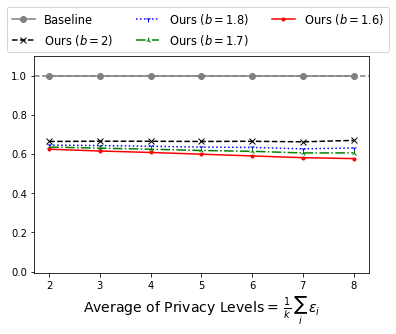

In [4]:
privacy = evaluation(5)

s = [2,3,4,5,6,7,8]

fig = plt.figure()
plt.ylim(-0.01, 1.1)
plt.axhline(1, ls="--",color="gray")
plt.plot(s,privacy[:,0],marker="o",color="gray",linestyle = "-",label="Baseline")
plt.plot(s,privacy[:,1],marker="x",color="black",linestyle = "dashed",label="Ours $(b = 2)$")
plt.plot(s,privacy[:,2],marker="1",color="blue",linestyle = "dotted",label="Ours $(b = 1.8)$")
plt.plot(s,privacy[:,3],marker="2",color="green",linestyle = "dashdot",label="Ours $(b = 1.7)$")
plt.plot(s,privacy[:,4],marker=".",color="red",linestyle = "-",label="Ours $(b = 1.6)$")
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=3, fontsize=11.5)
plt.xlabel("Average of Privacy Levels" r"$= \, \frac{1}{k} \, \sum_i \, \epsilon_i$",fontsize=14)
fig.savefig("Privacy_k=5.png")
fig.savefig("figs/Privacy_k=5.eps", bbox_inches="tight", pad_inches=0.05)